In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_spss('r32i_os.sav')
data

,idind,bbredid_i,bbid_i,bbid_h,aaid_i,aaid_h,zid_i,zid_h,yid_i,yid_h,...,bbl53,bbl54,bbm96,bbm97,bbm98,bbm99,bbm100,bbm101,bbm109,bbm111
0,7.0,66301.0,1.000301e+06,10003.0,1000301.0,10003.0,1000301.0,10003.0,1000301.0,10003.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,92.0,68001.0,1.008401e+06,10084.0,1008401.0,10084.0,1008401.0,10084.0,1008401.0,10084.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93.0,68002.0,1.008402e+06,10084.0,1008402.0,10084.0,1008402.0,10084.0,1008402.0,10084.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,95.0,68004.0,1.008404e+06,10084.0,1008404.0,10084.0,1008404.0,10084.0,1008404.0,10084.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,102.0,68101.0,1.008601e+06,10086.0,1008601.0,10086.0,1008601.0,10086.0,1008601.0,10086.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11815,63954.0,660907.0,1.389002e+09,13890024.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11816,63955.0,663004.0,1.423019e+09,14230185.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11817,63956.0,665601.0,1.350669e+08,1350669.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11818,63957.0,666101.0,1.357046e+08,1357046.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data[[x for x in data.columns if 'bbj72.172' in x]]

,bbj72.172
0,NaN
1,3.0
2,3.0
3,3.0
4,2.0
...,...
11815,3.0
11816,NaN
11817,NaN
11818,2.0


In [34]:
dt['bbb1.o'] = dt['bbb1.o'].fillna(0)
dt['bbb1.n'] = dt['bbb1.n'].fillna(0)
dt['family_size'] = dt['bbb1.o'] + dt['bbb1.n']
dt1 = dt[['family_size', 'bbf11']]
dt1 = dt1.dropna()
dt1 = dt1[pd.to_numeric(dt1['bbf11'], errors='coerce').notnull()]
dt1

/var/folders/k3/d595fscx0sd4p776t_nkpc3h0000gn/T/ipykernel_60847/526996585.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['bbb1.o'] = dt['bbb1.o'].fillna(0)
/var/folders/k3/d595fscx0sd4p776t_nkpc3h0000gn/T/ipykernel_60847/526996585.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt['bbb1.n'] = dt['bbb1.n'].fillna(0)
/var/folders/k3/d595fscx0sd4p776t_nkpc3h0000gn/T/ipykernel_60847/526996585.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

,family_size,bbf11
2,4.0,101000.0
3,3.0,24000.0
4,5.0,12000.0
5,3.0,69000.0
7,6.0,220000.0
...,...,...
4775,1.0,17000.0
4777,3.0,273500.0
4781,2.0,49500.0
4783,5.0,180000.0


In [35]:
dt1['bbf11'] = dt1['bbf11'].replace(['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ', 'НЕТ ОТВЕТА', 'ОТКАЗ ОТ ОТВЕТА'], pd.NA)
dt1['bbf11']

2       101000.0
3        24000.0
4        12000.0
5        69000.0
7       220000.0
          ...   
4775     17000.0
4777    273500.0
4781     49500.0
4783    180000.0
4784    115000.0
Name: bbf11, Length: 3029, dtype: category
Categories (467, float64): [1200.0, 1300.0, 1500.0, 1900.0, ..., 400000.0, 431200.0, 700000.0, 805000.0]

In [40]:
dt1 = data[['bbj72.172', 'bbj13.2']]
dt1 = dt1[pd.to_numeric(dt1['bbj72.172'], errors='coerce').notnull()]
dt1 = dt1[pd.to_numeric(dt1['bbj13.2'], errors='coerce').notnull()]
dt1 = dt1[dt1['bbj13.2'].apply(lambda x: x!='ЗАТРУДНЯЮСЬ ОТВЕТИТЬ')]
dt1 = dt1[dt1['bbj13.2'].apply(lambda x: x not in ['ЗАТРУДНЯЮСЬ ОТВЕТИТЬ','НЕТ ОТВЕТА','ОТКАЗ ОТ ОТВЕТА'] and float(x) < 300000.0)]
dt1

,bbj72.172,bbj13.2
2,3.0,35000.0
6,1.0,90000.0
7,3.0,25000.0
8,1.0,40000.0
12,1.0,50000.0
...,...,...
11787,2.0,30000.0
11797,2.0,150000.0
11809,1.0,30000.0
11814,2.0,40000.0


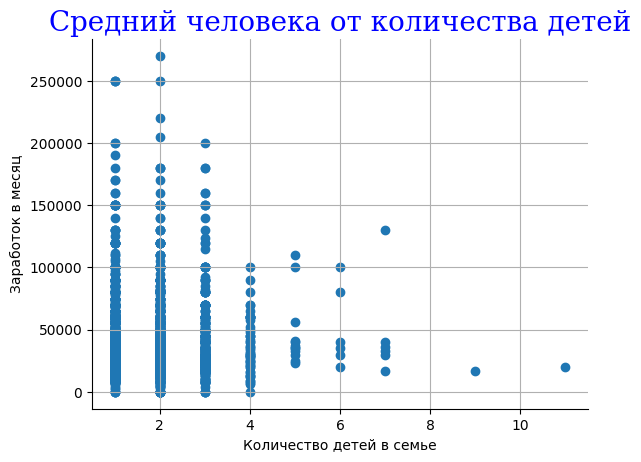

In [42]:
plt.scatter(dt1['bbj72.172'],dt1['bbj13.2'])
ax = plt.gca()  
plt.grid()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.title("Средний человека от количества детей",{'family':'serif','color':'blue','size':20})
plt.xlabel("Количество детей в семье")
plt.ylabel("Заработок в месяц")
plt.show()

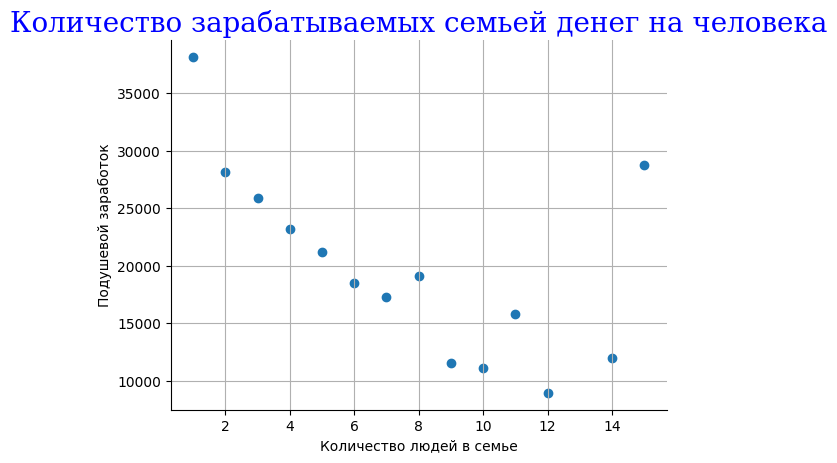

In [39]:
plt.scatter(d2.keys(),d2.values())
ax = plt.gca()  
plt.grid()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.title("Количество зарабатываемых семьей денег на человека",{'family':'serif','color':'blue','size':20})
plt.xlabel("Количество людей в семье")
plt.ylabel("Подушевой заработок")
plt.show()